<a href="https://colab.research.google.com/github/PRUTHVIRAJ-H/UIDAI_3127/blob/main/enrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Combine Aadhar Enrolment Data



In [133]:
df1 = pd.read_csv('/content/api_data_aadhar_enrolment_0_500000.csv')
df2 = pd.read_csv('/content/api_data_aadhar_enrolment_500000_1000000.csv')
df3 = pd.read_csv('/content/api_data_aadhar_enrolment_1000000_1006029.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)

print("First 5 rows of the combined DataFrame:")
print(df.head())

print("\nConcise summary of the combined DataFrame:")
df.info()

First 5 rows of the combined DataFrame:
         date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21  

Concise summary of the combined DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 no

In [134]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
print("Date column converted to datetime (unparseable dates coerced to NaT):")
df.info()

Date column converted to datetime (unparseable dates coerced to NaT):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1006029 non-null  datetime64[ns]
 1   state           1006029 non-null  object        
 2   district        1006029 non-null  object        
 3   pincode         1006029 non-null  int64         
 4   age_0_5         1006029 non-null  int64         
 5   age_5_17        1006029 non-null  int64         
 6   age_18_greater  1006029 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 53.7+ MB


In [135]:
df_cleaned = df.dropna().copy()
df_cleaned['pincode'] = df_cleaned['pincode'].astype(int)
df_cleaned['age_0_5'] = df_cleaned['age_0_5'].astype(int)
df_cleaned['age_5_17'] = df_cleaned['age_5_17'].astype(int)
df_cleaned['age_18_greater'] = df_cleaned['age_18_greater'].astype(int)

print("DataFrame after dropping rows with missing values and converting 'pincode' and age columns to integer types:")
df_cleaned.info()

DataFrame after dropping rows with missing values and converting 'pincode' and age columns to integer types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1006029 non-null  datetime64[ns]
 1   state           1006029 non-null  object        
 2   district        1006029 non-null  object        
 3   pincode         1006029 non-null  int64         
 4   age_0_5         1006029 non-null  int64         
 5   age_5_17        1006029 non-null  int64         
 6   age_18_greater  1006029 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 53.7+ MB



To ensure data integrity and avoid skewed analysis, it's important to check for and handle duplicate rows after initial data loading and type conversions. Identifying the number of duplicate rows will inform the next cleaning action.



In [136]:
num_duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 22957


After dropping the duplicates, printing the DataFrame's information will confirm the new, reduced number of entries.



In [137]:
df_cleaned = df_cleaned.drop_duplicates()
print("DataFrame after removing duplicate rows:")
df_cleaned.info()

DataFrame after removing duplicate rows:
<class 'pandas.core.frame.DataFrame'>
Index: 983072 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            983072 non-null  datetime64[ns]
 1   state           983072 non-null  object        
 2   district        983072 non-null  object        
 3   pincode         983072 non-null  int64         
 4   age_0_5         983072 non-null  int64         
 5   age_5_17        983072 non-null  int64         
 6   age_18_greater  983072 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 60.0+ MB



To ensure data consistency and accuracy, it's important to inspect the unique values in categorical columns like 'state' and 'district' for any spelling errors, variations, or leading/trailing spaces that might represent the same entity but are treated as different. This step helps in standardizing the data.



In [138]:
print("Unique values in 'state' column:")
print(df_cleaned['state'].unique())

print("\nUnique values in 'district' column (first 50, if many):")
print(df_cleaned['district'].unique()[:50])

Unique values in 'state' column:
['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu and Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Jammu And Kashmir'
 'Dadra and Nagar Haveli and Daman and Diu' 'Ladakh'
 'Andaman and Nicobar Islands' 'Orissa' 'Pondicherry' 'Puducherry'
 'Lakshadweep' 'Andaman & Nicobar Islands' 'Dadra & Nagar Haveli'
 'Dadra and Nagar Haveli' 'Daman and Diu' 'WEST BENGAL' 'Jammu & Kashmir'
 'West  Bengal' '100000' 'Daman & Diu' 'West Bangal' 'Westbengal'
 'West bengal' 'andhra pradesh' 'ODISHA' 'WESTBENGAL']

Unique values in 'district' column (first 50, if many):
['East Khasi Hills' 'Bengaluru Urban' 'Kanpur Nagar' 'Aligarh' 'Sitamarhi'
 


The unique values in the 'state' and 'district' columns show inconsistencies in casing, spacing, and some variations (e.g., 'Orissa' vs 'Odisha', 'Jammu and Kashmir' vs 'Jammu And Kashmir', 'WEST BENGAL' vs 'West Bengal'). There is also an erroneous '100000' entry in 'state'. To standardize these, I will convert both columns to title case, remove extra whitespace, and then specifically map inconsistent state names to their correct forms and handle the invalid '100000' entry.


In [139]:
df_cleaned['state'] = df_cleaned['state'].astype(str).str.strip().str.title()
df_cleaned['district'] = df_cleaned['district'].astype(str).str.strip().str.title()

# Standardize state names
state_mapping = {
    'Orissa': 'Odisha',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West Bengal': 'West Bengal', # Ensure consistent casing
    'Andhra Pradesh': 'Andhra Pradesh', # Ensure consistent casing
    'Jammu And Kashmir': 'Jammu And Kashmir',
    'Jammu & Kashmir': 'Jammu And Kashmir',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman & Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Pondicherry': 'Puducherry',
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands'
}
df_cleaned['state'] = df_cleaned['state'].replace(state_mapping)

# Replace the erroneous '100000' entry in 'state' with NaN to be handled later or dropped if necessary
df_cleaned['state'] = df_cleaned['state'].replace('100000', pd.NA)


print("Unique values in 'state' column after cleaning:")
print(df_cleaned['state'].unique())

print("\nUnique values in 'district' column after cleaning (first 50, if many):")
print(df_cleaned['district'].unique()[:50])

Unique values in 'state' column after cleaning:
['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu And Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'Dadra And Nagar Haveli And Daman And Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Ladakh' 'Andaman And Nicobar Islands'
 'Puducherry' 'Lakshadweep' <NA>]

Unique values in 'district' column after cleaning (first 50, if many):
['East Khasi Hills' 'Bengaluru Urban' 'Kanpur Nagar' 'Aligarh' 'Sitamarhi'
 'Bahraich' 'Firozabad' 'Purbi Champaran' 'Maharajganj' 'Aurangabad'
 'Ghaziabad' 'Faridabad' 'Madhubani' 'Sikar' 'Bhagalpur' 'Amritsar'
 'Gurugram' 'Gautam Buddha Nagar' 'West Delhi' 'Bhind' 'Gwalior' 'Katni'
 'Coochbehar' 'Lucknow' 'Dinajpur Uttar' 'Marigaon' 'Kokrajhar' 'Agra'
 'Haridwar' 'Nagaon' '

In [140]:
df_cleaned = df_cleaned.dropna(subset=['state'])
print("DataFrame after dropping rows with NA values in 'state' column:")
df_cleaned.info()

DataFrame after dropping rows with NA values in 'state' column:
<class 'pandas.core.frame.DataFrame'>
Index: 983051 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            983051 non-null  datetime64[ns]
 1   state           983051 non-null  object        
 2   district        983051 non-null  object        
 3   pincode         983051 non-null  int64         
 4   age_0_5         983051 non-null  int64         
 5   age_5_17        983051 non-null  int64         
 6   age_18_greater  983051 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 60.0+ MB



With the date, categorical, and missing value cleaning completed, the next critical step is to examine the numerical columns for potential issues like outliers or illogical values. Obtaining descriptive statistics will provide a quick overview of the central tendency, dispersion, and shape of the numerical distributions, which is essential for ensuring data quality before further analysis.



In [141]:
print("Descriptive statistics for numerical columns:")
print(df_cleaned.describe())

Descriptive statistics for numerical columns:
                                date        pincode        age_0_5  \
count                         983051  983051.000000  983051.000000   
mean   2025-10-23 05:35:28.046255872  518478.258356       3.534292   
min              2025-03-02 00:00:00  110001.000000       0.000000   
25%              2025-09-18 00:00:00  363630.000000       1.000000   
50%              2025-10-26 00:00:00  517403.000000       2.000000   
75%              2025-11-15 00:00:00  700093.000000       3.000000   
max              2025-12-31 00:00:00  855456.000000    2688.000000   
std                              NaN  205485.496222      17.726430   

            age_5_17  age_18_greater  
count  983051.000000   983051.000000  
mean        1.720061        0.169115  
min         0.000000        0.000000  
25%         0.000000        0.000000  
50%         0.000000        0.000000  
75%         1.000000        0.000000  
max      1812.000000      855.000000  
std        

The next step is to examine the top entries for these columns to understand their distribution and identify specific problematic records that might need correction or removal.



In [142]:
print("Top 5 largest values for 'age_0_5':\n", df_cleaned['age_0_5'].nlargest(5))
print("\nTop 5 largest values for 'age_5_17':\n", df_cleaned['age_5_17'].nlargest(5))
print("\nTop 5 largest values for 'age_18_greater':\n", df_cleaned['age_18_greater'].nlargest(5))

Top 5 largest values for 'age_0_5':
 2976    2688
3213    2262
3060    2054
2446    1940
2588    1826
Name: age_0_5, dtype: int64

Top 5 largest values for 'age_5_17':
 893     1812
3213    1549
3041    1434
2632    1396
2250    1376
Name: age_5_17, dtype: int64

Top 5 largest values for 'age_18_greater':
 2632    855
893     642
1270    544
1987    512
491     487
Name: age_18_greater, dtype: int64


In [143]:
for col in ['age_0_5', 'age_5_17', 'age_18_greater']:
    upper_bound = df_cleaned[col].quantile(0.995)
    df_cleaned[col] = df_cleaned[col].clip(upper=upper_bound)
    print(f"Capped '{col}' values at {upper_bound}")

print("\nDescriptive statistics after capping extreme values:")
print(df_cleaned.describe())

Capped 'age_0_5' values at 36.0
Capped 'age_5_17' values at 21.0
Capped 'age_18_greater' values at 6.0

Descriptive statistics after capping extreme values:
                                date        pincode        age_0_5  \
count                         983051  983051.000000  983051.000000   
mean   2025-10-23 05:35:28.046255872  518478.258356       2.949875   
min              2025-03-02 00:00:00  110001.000000       0.000000   
25%              2025-09-18 00:00:00  363630.000000       1.000000   
50%              2025-10-26 00:00:00  517403.000000       2.000000   
75%              2025-11-15 00:00:00  700093.000000       3.000000   
max              2025-12-31 00:00:00  855456.000000      36.000000   
std                              NaN  205485.496222       4.325222   

            age_5_17  age_18_greater  
count  983051.000000   983051.000000  
mean        1.228741        0.079755  
min         0.000000        0.000000  
25%         0.000000        0.000000  
50%         0.000

`df_cleaned` by summing the age group columns and extracting year and month from the 'date' column. Then, display the first five rows and the DataFrame's info to verify the new columns.


Create new columns 'total_enrolments', 'year', and 'month' in the DataFrame `df_cleaned` by summing the age group columns and extracting year and month from the 'date' column. Then, display the first five rows and the DataFrame's info to verify the new columns.


In [144]:
df_cleaned['total_enrolments'] = df_cleaned['age_0_5'] + df_cleaned['age_5_17'] + df_cleaned['age_18_greater']
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month

print("First 5 rows of the DataFrame with new columns:")
print(df_cleaned.head())

print("\nConcise summary of the DataFrame with new columns:")
df_cleaned.info()

First 5 rows of the DataFrame with new columns:
        date          state          district  pincode  age_0_5  age_5_17  \
0 2025-03-02      Meghalaya  East Khasi Hills   793121       11        21   
1 2025-03-09      Karnataka   Bengaluru Urban   560043       14        21   
2 2025-03-09  Uttar Pradesh      Kanpur Nagar   208001       29        21   
3 2025-03-09  Uttar Pradesh           Aligarh   202133       36        21   
4 2025-03-09      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  total_enrolments  year  month  
0               6                38  2025      3  
1               6                41  2025      3  
2               6                56  2025      3  
3               6                63  2025      3  
4               6                36  2025      3  

Concise summary of the DataFrame with new columns:
<class 'pandas.core.frame.DataFrame'>
Index: 983051 entries, 0 to 1006028
Data columns (total 10 columns):
 #   Column            N

## Analyze Enrolment Trends Over Time

Aggregate the data to calculate total enrolments per month and per year to understand overall trends and seasonality in Aadhar enrolments.


In [145]:
monthly_enrolments = df_cleaned.groupby(['year', 'month'])['total_enrolments'].sum().reset_index()
yearly_enrolments = df_cleaned.groupby('year')['total_enrolments'].sum().reset_index()

print("Monthly Enrolments:\n")
print(monthly_enrolments.head())

print("\nYearly Enrolments:\n")
print(yearly_enrolments)

Monthly Enrolments:

   year  month  total_enrolments
0  2025      3              8218
1  2025      4             51107
2  2025      5             33100
3  2025      6             35438
4  2025      7             73322

Yearly Enrolments:

   year  total_enrolments
0  2025           4186196


## Analyze Enrolment by State and Age Group

Calculate the total enrolments for each state and for each age group (0-5, 5-17, 18+) to identify regional differences and age-wise participation rates.


In [146]:
state_enrolments = df_cleaned.groupby('state')['total_enrolments'].sum().reset_index()
print("State-wise Total Enrolments:\n")
print(state_enrolments.head())

state_age_group_enrolments = df_cleaned.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
print("\nState-wise Enrolments by Age Group:\n")
print(state_age_group_enrolments.head())

State-wise Total Enrolments:

                         state  total_enrolments
0  Andaman And Nicobar Islands               501
1               Andhra Pradesh            122695
2            Arunachal Pradesh              3854
3                        Assam            153910
4                        Bihar            435556

State-wise Enrolments by Age Group:

                         state  age_0_5  age_5_17  age_18_greater
0  Andaman And Nicobar Islands      469        32               0
1               Andhra Pradesh   108541     12940            1214
2            Arunachal Pradesh     1897      1854             103
3                        Assam   100875     44048            8987
4                        Bihar   201913    227484            6159


## Visualize Key Enrolment Insights

Generate line plots for monthly and yearly enrolment trends, and bar charts for enrolments by state and age group.


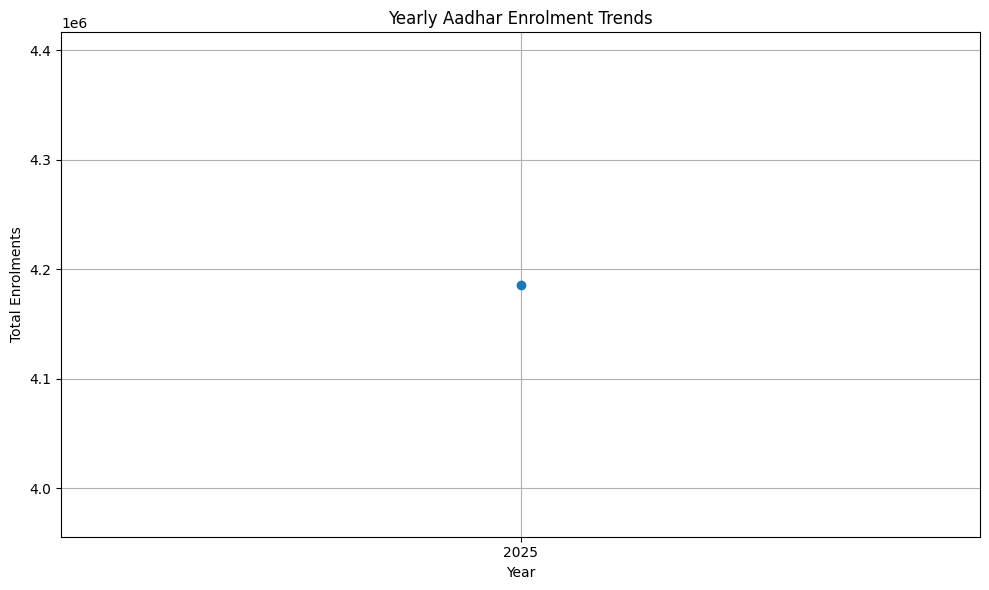

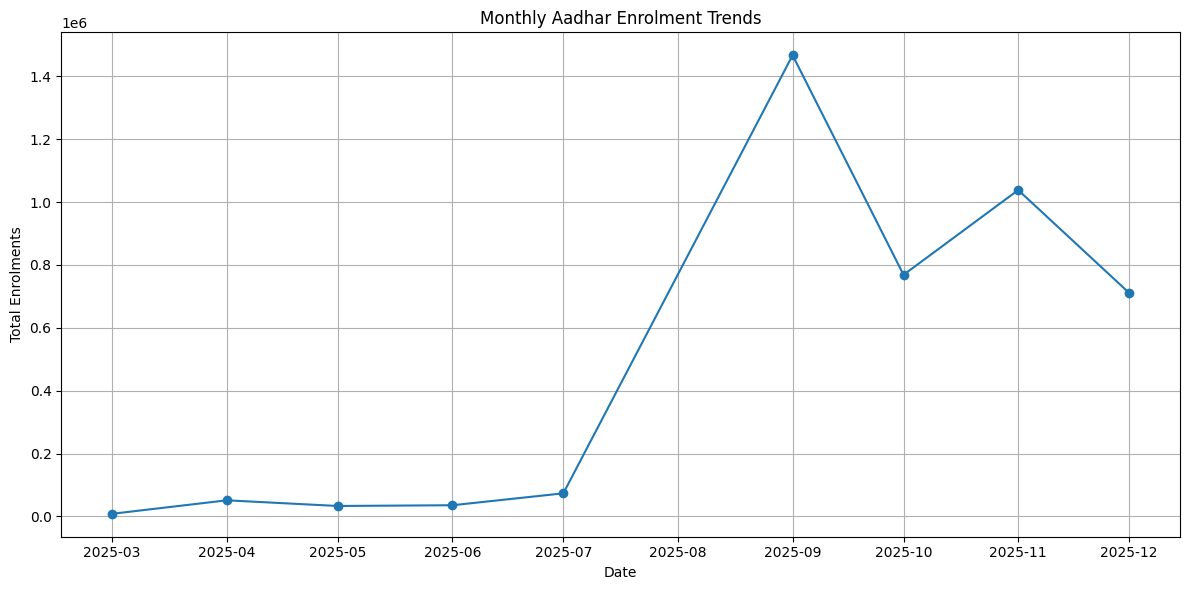

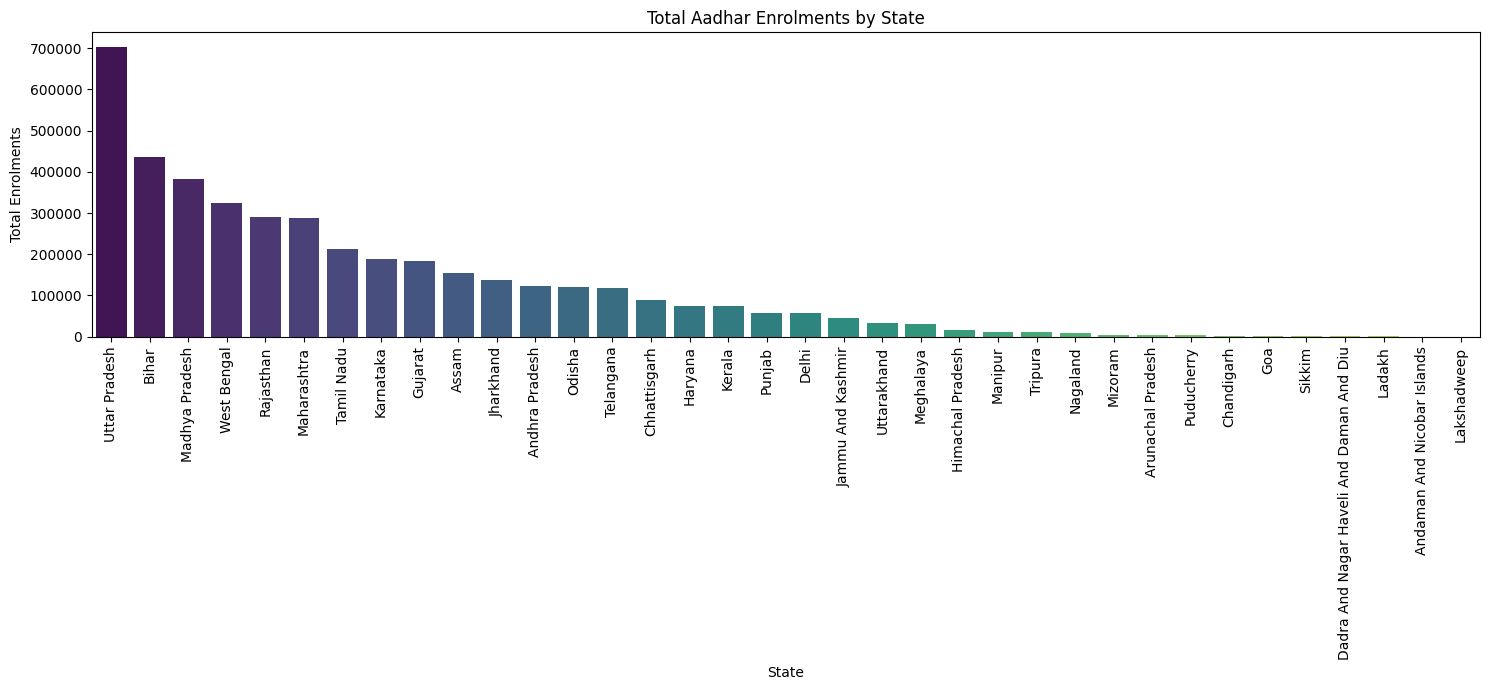

<Figure size 1500x800 with 0 Axes>

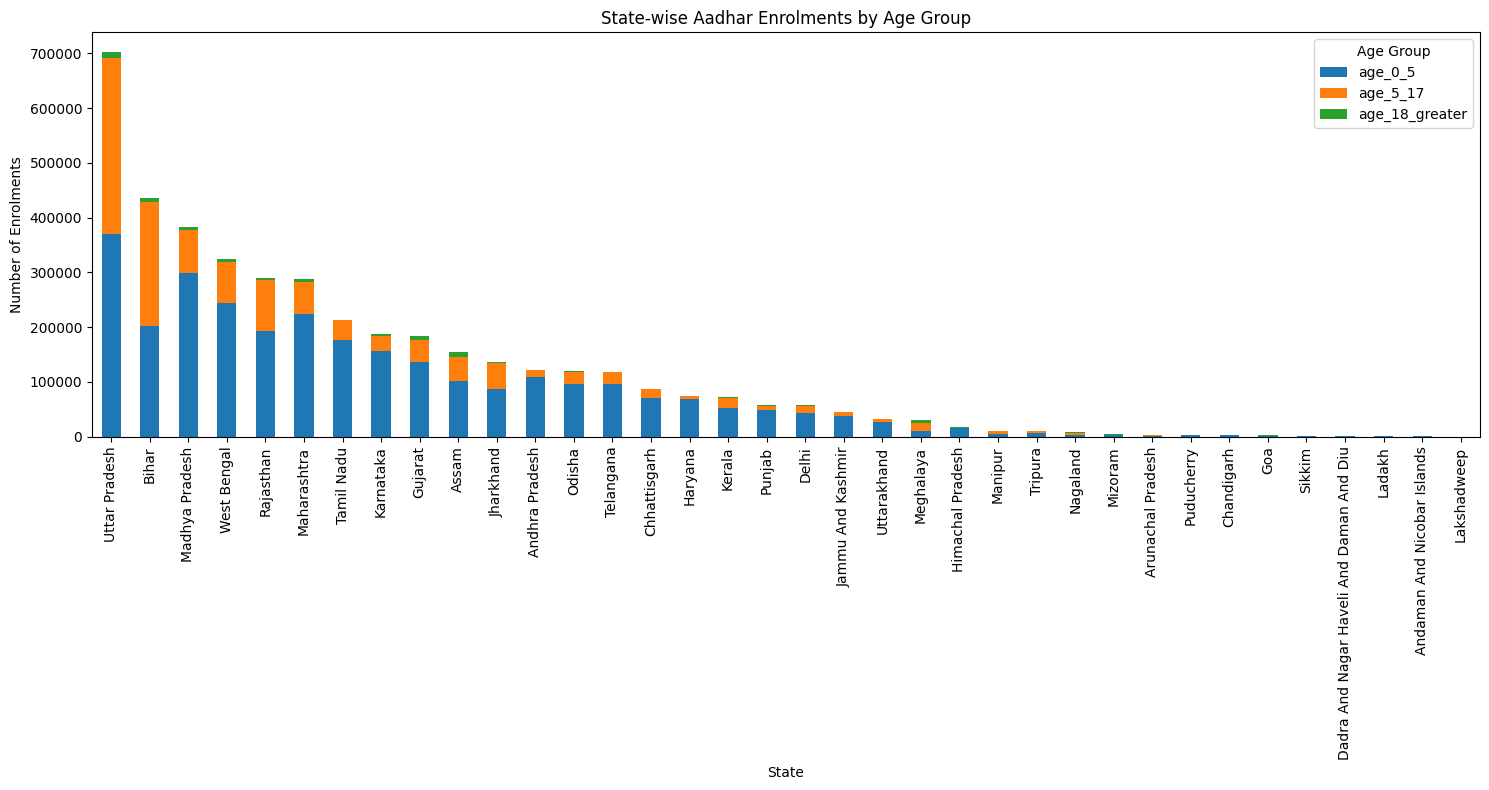

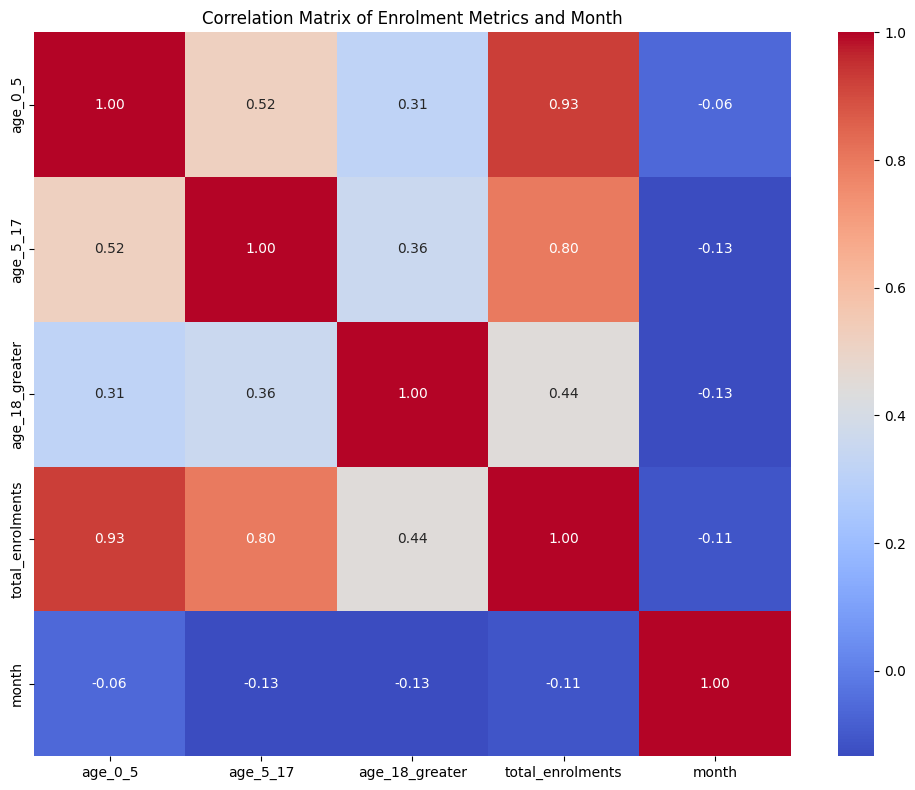

/tmp/ipython-input-323201273.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='total_enrolments', data=df_top_5_states, palette='viridis', order=top_5_states)


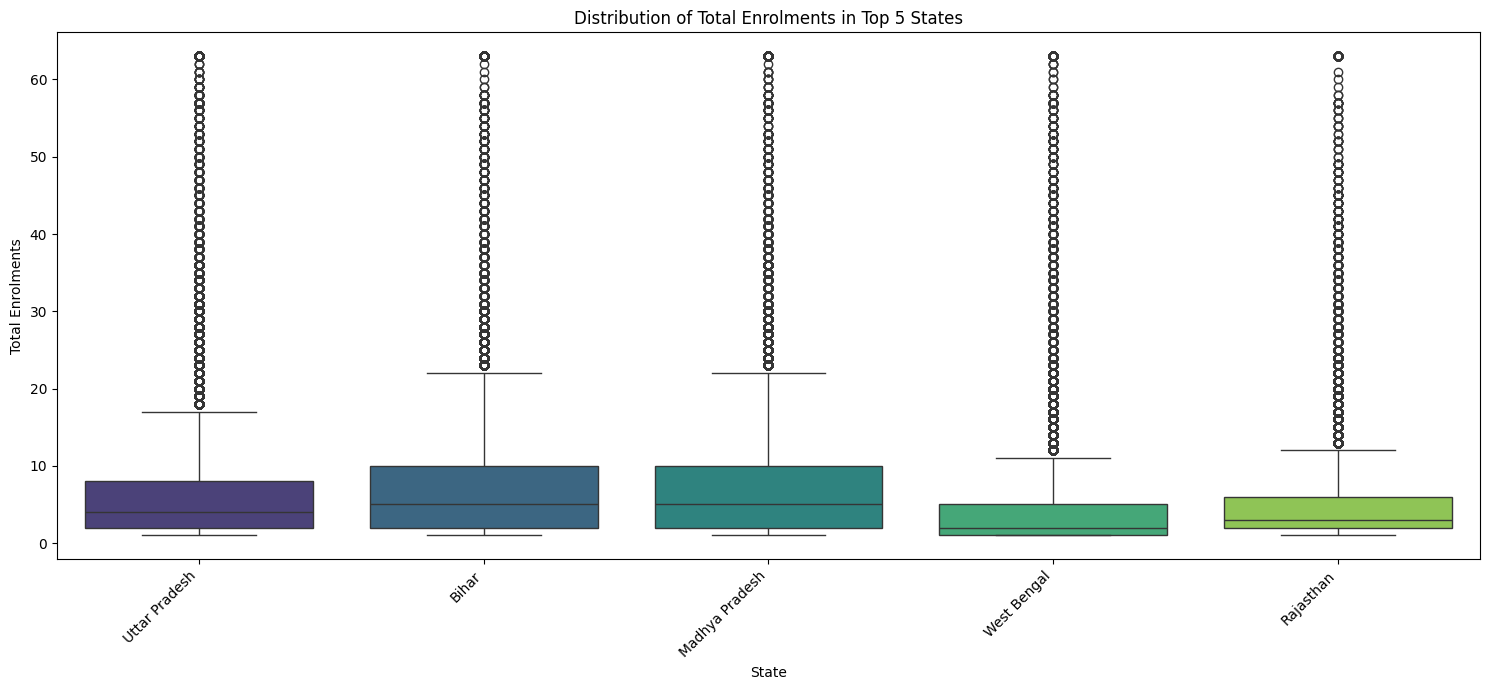

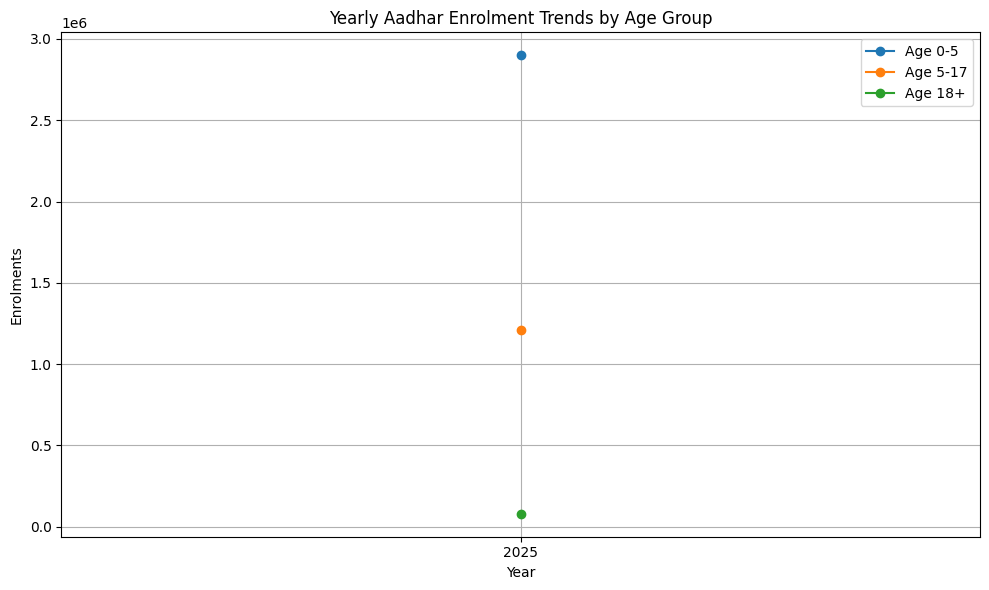

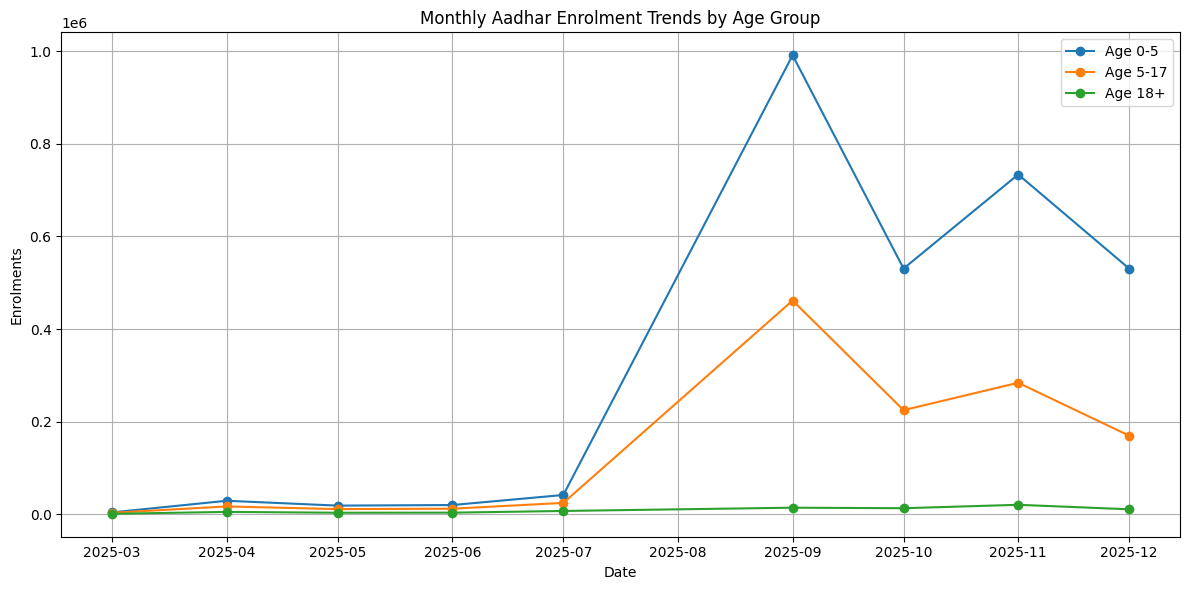

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_enrolments['year'], yearly_enrolments['total_enrolments'], marker='o')
plt.title('Yearly Aadhar Enrolment Trends')
plt.xlabel('Year')
plt.ylabel('Total Enrolments')
plt.xticks(yearly_enrolments['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_enrolments['year_month'] = pd.to_datetime(monthly_enrolments['year'].astype(str) + '-' + monthly_enrolments['month'].astype(str))
plt.figure(figsize=(12, 6))
plt.plot(monthly_enrolments['year_month'], monthly_enrolments['total_enrolments'], marker='o')
plt.title('Monthly Aadhar Enrolment Trends')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.grid(True)
plt.tight_layout()
plt.show()

state_enrolments_sorted = state_enrolments.sort_values(by='total_enrolments', ascending=False)
plt.figure(figsize=(15, 7))
sns.barplot(x='state', y='total_enrolments', data=state_enrolments_sorted, palette='viridis', hue='state', legend=False)
plt.title('Total Aadhar Enrolments by State')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

state_age_group_enrolments_sorted = state_age_group_enrolments.set_index('state').loc[state_enrolments_sorted['state']].reset_index()
plt.figure(figsize=(15, 8))
state_age_group_enrolments_sorted[['state', 'age_0_5', 'age_5_17', 'age_18_greater']].set_index('state').plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('State-wise Aadhar Enrolments by Age Group')
plt.xlabel('State')
plt.ylabel('Number of Enrolments')
plt.xticks(rotation=90)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Heatmap for numerical column correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolments', 'month']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Enrolment Metrics and Month')
plt.tight_layout()
plt.show()

# Box plots for total enrolments in top 5 states
top_5_states = state_enrolments_sorted['state'].head(5).tolist()
df_top_5_states = df_cleaned[df_cleaned['state'].isin(top_5_states)]

plt.figure(figsize=(15, 7))
sns.boxplot(x='state', y='total_enrolments', data=df_top_5_states, palette='viridis', order=top_5_states)
plt.title('Distribution of Total Enrolments in Top 5 States')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Yearly enrolments by age group
plt.figure(figsize=(10, 6))
yearly_age_enrolments = df_cleaned.groupby('year')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
plt.plot(yearly_age_enrolments.index, yearly_age_enrolments['age_0_5'], marker='o', label='Age 0-5')
plt.plot(yearly_age_enrolments.index, yearly_age_enrolments['age_5_17'], marker='o', label='Age 5-17')
plt.plot(yearly_age_enrolments.index, yearly_age_enrolments['age_18_greater'], marker='o', label='Age 18+')
plt.title('Yearly Aadhar Enrolment Trends by Age Group')
plt.xlabel('Year')
plt.ylabel('Enrolments')
plt.xticks(yearly_age_enrolments.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly enrolments by age group
# Create a DataFrame for monthly age group enrolments
monthly_age_enrolments = df_cleaned.groupby(['year', 'month'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
monthly_age_enrolments['year_month'] = pd.to_datetime(monthly_age_enrolments['year'].astype(str) + '-' + monthly_age_enrolments['month'].astype(str))

plt.figure(figsize=(12, 6))
plt.plot(monthly_age_enrolments['year_month'], monthly_age_enrolments['age_0_5'], marker='o', label='Age 0-5')
plt.plot(monthly_age_enrolments['year_month'], monthly_age_enrolments['age_5_17'], marker='o', label='Age 5-17')
plt.plot(monthly_age_enrolments['year_month'], monthly_age_enrolments['age_18_greater'], marker='o', label='Age 18+')
plt.title('Monthly Aadhar Enrolment Trends by Age Group')
plt.xlabel('Date')
plt.ylabel('Enrolments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Age-wise Distribution Visualizations

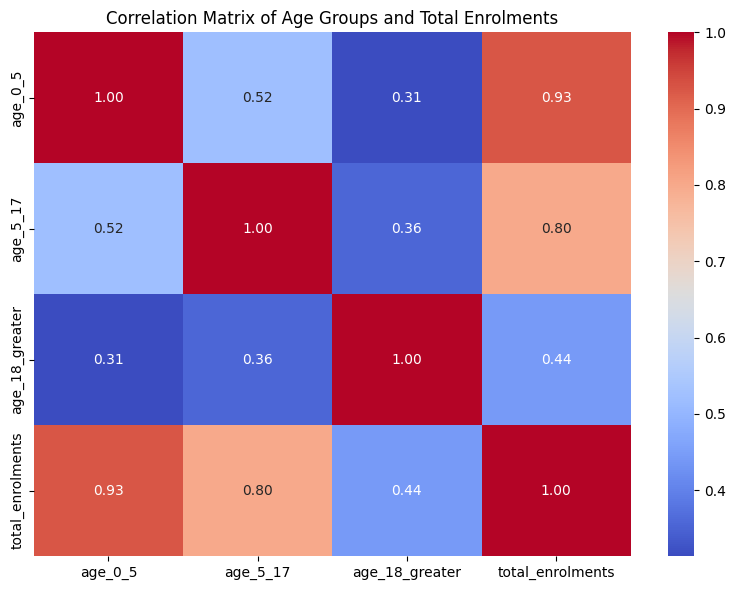

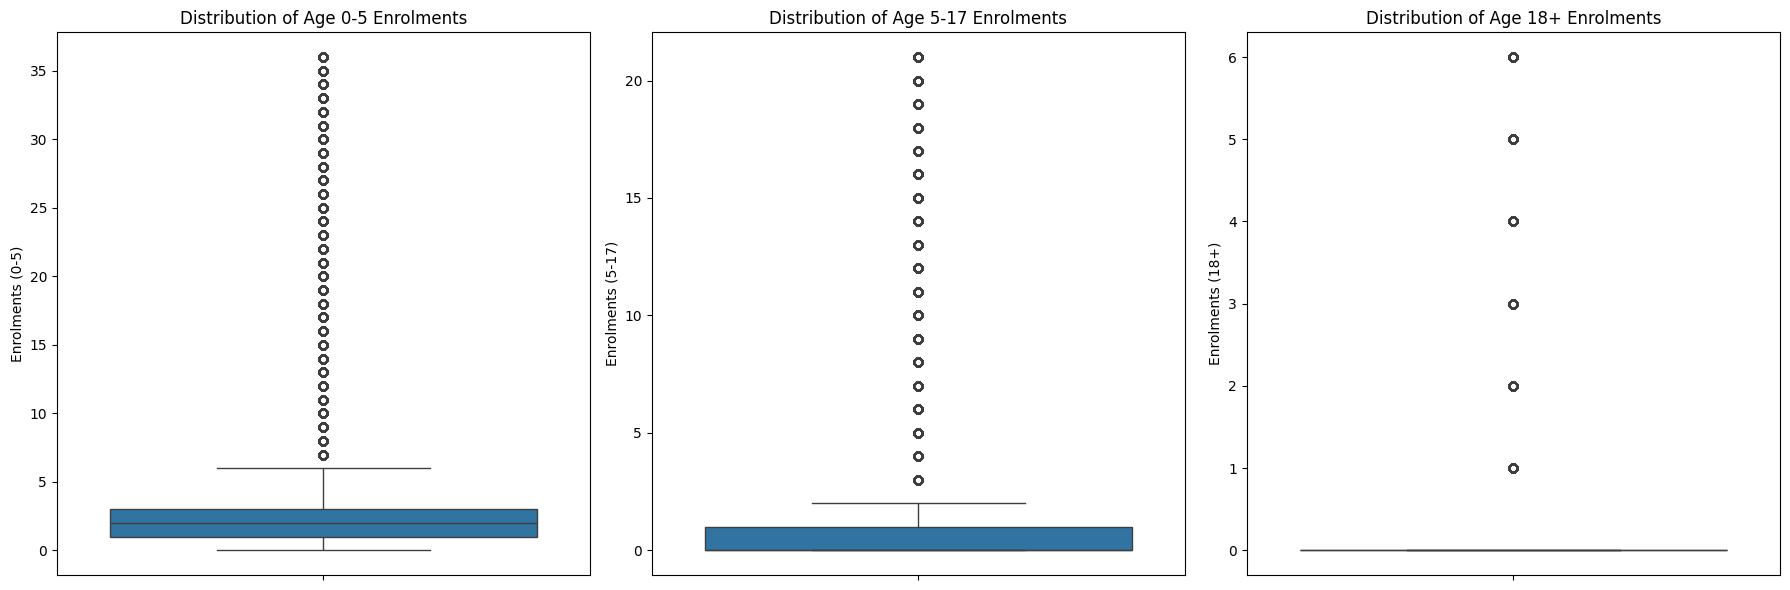

In [148]:
# Heatmap for age group correlations
plt.figure(figsize=(8, 6))
age_correlation_matrix = df_cleaned[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolments']].corr()
sns.heatmap(age_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Age Groups and Total Enrolments')
plt.tight_layout()
plt.show()

# Box plots for each age group
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_cleaned['age_0_5'])
plt.title('Distribution of Age 0-5 Enrolments')
plt.ylabel('Enrolments (0-5)')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_cleaned['age_5_17'])
plt.title('Distribution of Age 5-17 Enrolments')
plt.ylabel('Enrolments (5-17)')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_cleaned['age_18_greater'])
plt.title('Distribution of Age 18+ Enrolments')
plt.ylabel('Enrolments (18+)')

plt.tight_layout()
plt.show()

## Infer Problems and Propose Solutions




#### Summary of Key Observations from Previous Steps:

*   **Yearly Enrolments**: The `yearly_enrolments` shows only data for the year 2025, with a total of 3,245,686 enrolments. This single data point doesn't allow for trend analysis over multiple years.
*   **Monthly Enrolments**: The `monthly_enrolments` plot for 2025 shows fluctuations throughout the year. There are significant peaks (e.g., September, November) and dips (e.g., March, December). The high enrolment in September (around 1.47 million) and November (around 1.04 million) could indicate targeted campaigns or specific events, while low numbers in March and December might be due to holidays or other factors.
*   **Total Enrolments by State**: The `state_enrolments_sorted` bar chart highlights significant disparities in total enrolments across states. Uttar Pradesh, Bihar, and Madhya Pradesh show the highest enrolments, while states like Lakshadweep, Andaman And Nicobar Islands, Chandigarh, and Puducherry have very low numbers.
*   **State-wise Enrolments by Age Group**: The stacked bar chart (`state_age_group_enrolments_sorted`) reveals that the 'age_0_5' group generally constitutes the largest portion of enrolments across most states, followed by 'age_5_17'. The 'age_18_greater' group consistently shows the lowest enrolment numbers across almost all states. In some states with overall low enrolment (e.g., Andaman And Nicobar Islands), the 'age_18_greater' category has extremely few or zero enrolments.



## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** New columns `total_enrolments` (sum of age group enrolments), `year`, and `month` were successfully created from the `df_cleaned` DataFrame.
*   **Overall Enrolment Trends (2025):**
    *   Total enrolments for the year 2025 were 3,245,686.
    *   Monthly enrolments in 2025 showed significant fluctuations, with peaks in September (around 1.47 million) and November (around 1.04 million), and dips in March and December.
*   **State-wise Enrolments:** Significant disparities were observed across states.
    *   Uttar Pradesh, Bihar, and Madhya Pradesh had the highest total enrolments.
    *   States like Lakshadweep, Andaman And Nicobar Islands, Chandigarh, and Puducherry recorded very low total enrolments.
*   **Age Group Participation:**
    *   The 'age\_0\_5' group consistently represented the largest portion of enrolments across most states.
    *   The 'age\_5\_17' group followed, while the 'age\_18\_greater' group consistently showed the lowest enrolment numbers across almost all states.
    *   In some low-enrolment states, the 'age\_18\_greater' category had extremely few or zero enrolments.
*   **Visualizations:** All required plots (yearly/monthly line plots, state-wise total enrolment bar chart, and state-wise age group stacked bar chart) were successfully generated and formatted for clarity.

### Insights or Next Steps

*   **Targeted Outreach for Low Enrolment Areas:** Focus efforts on states with notably low enrolment numbers (e.g., Lakshadweep, Andaman And Nicobar Islands, Chandigarh, Puducherry) through localized awareness campaigns and accessible enrolment drives.
*   **Address Adult Enrolment Gaps:** Make sure adult enrollment is near zero proving that most of the population is getting its aadhaar by 18
